## **Libraries**

In [1]:
#Basic libraries
import numpy as np
import pandas as pd

#Visualization library
import matplotlib.pyplot as plt

##MNIST Dataset from sklearn
from sklearn.datasets import fetch_openml

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.activations import relu
from keras.optimizers import adam_v2
from keras.metrics import categorical_crossentropy

##Ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

## **Dataset**

In [2]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train_ = keras.utils.to_categorical(y_train, 10)
y_test_ = keras.utils.to_categorical(y_test, 10)

## **Visualizing the target category**

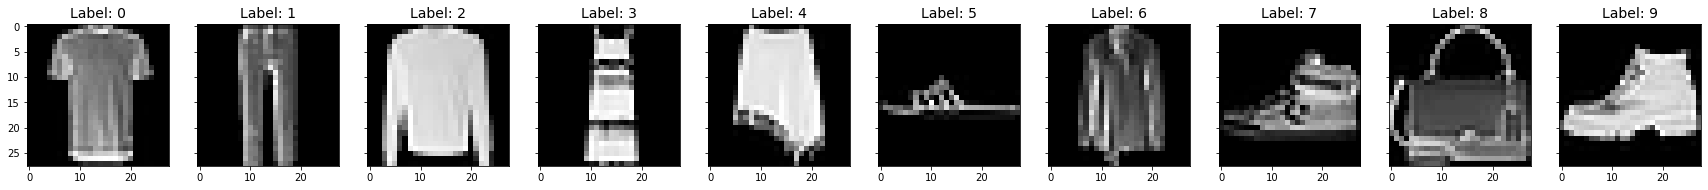

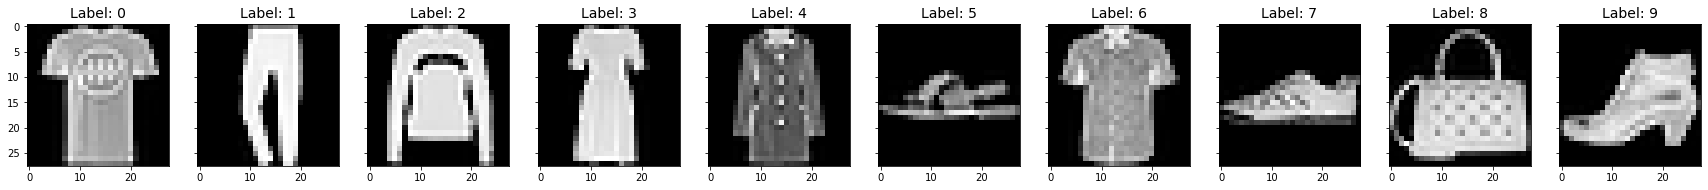

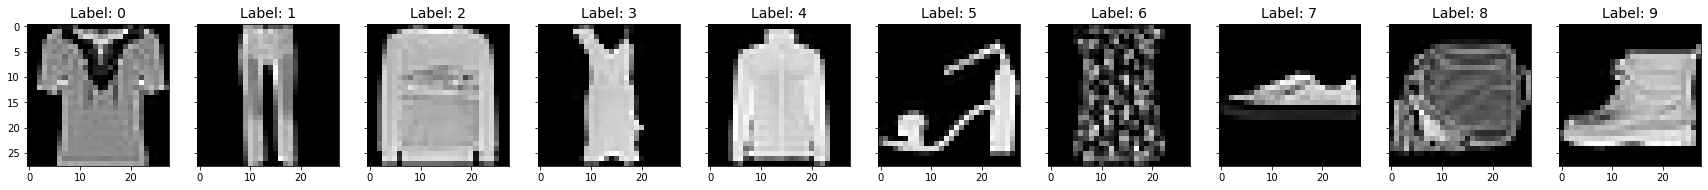

In [4]:
num_classes = 10 

for j in range(0,3):
  fig, axes = plt.subplots(1, num_classes, figsize = (30,20), sharey = True)
  index = np.random.randint(0, 1000) ## Creating a random index between 0 and 1000
  for i in range(0, num_classes):
    sample = X_train[y_train == i][index]
    axes[i].imshow(sample, cmap = 'gray')
    axes[i].set_title(f"Label: {i}", fontsize = 14)

## **Modelling (Artificial Neural Network)**

In [5]:
model = Sequential()

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
              adam_v2.Adam(learning_rate = 0.001), 
              loss = "categorical_crossentropy", 
              metrics = ["accuracy"]
              )

In [8]:
model.fit(
    x= X_train,
    y= y_train_,
    batch_size= 900,
    epochs= 50,
    verbose= 2,
    validation_split=0.2,
    shuffle = True
)

Epoch 1/50
54/54 - 3s - loss: 0.9109 - accuracy: 0.6975 - val_loss: 0.5311 - val_accuracy: 0.8136 - 3s/epoch - 59ms/step
Epoch 2/50
54/54 - 2s - loss: 0.4809 - accuracy: 0.8325 - val_loss: 0.4860 - val_accuracy: 0.8264 - 2s/epoch - 29ms/step
Epoch 3/50
54/54 - 2s - loss: 0.4334 - accuracy: 0.8489 - val_loss: 0.4245 - val_accuracy: 0.8512 - 2s/epoch - 28ms/step
Epoch 4/50
54/54 - 1s - loss: 0.4035 - accuracy: 0.8581 - val_loss: 0.4023 - val_accuracy: 0.8568 - 1s/epoch - 28ms/step
Epoch 5/50
54/54 - 2s - loss: 0.3756 - accuracy: 0.8674 - val_loss: 0.3910 - val_accuracy: 0.8640 - 2s/epoch - 28ms/step
Epoch 6/50
54/54 - 2s - loss: 0.3619 - accuracy: 0.8725 - val_loss: 0.3926 - val_accuracy: 0.8617 - 2s/epoch - 44ms/step
Epoch 7/50
54/54 - 2s - loss: 0.3468 - accuracy: 0.8765 - val_loss: 0.3945 - val_accuracy: 0.8597 - 2s/epoch - 36ms/step
Epoch 8/50
54/54 - 2s - loss: 0.3313 - accuracy: 0.8823 - val_loss: 0.3645 - val_accuracy: 0.8678 - 2s/epoch - 31ms/step
Epoch 9/50
54/54 - 2s - loss: 0.

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_)
print(f"Test Loss : {test_loss}, Test Accuracy : {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3775 - accuracy: 0.8849
Test Loss : 0.377450555562973, Test Accuracy : 0.8848999738693237


In [10]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)

In [11]:
accuracy_score(y_test.astype(str), y_pred_classes.astype(str))

0.8849

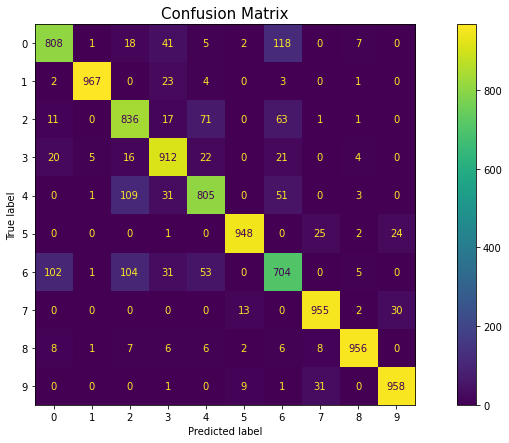

In [12]:
labels = [f"{x}" for x in range(10)]
cm = confusion_matrix(y_test.astype(str), y_pred_classes.astype(str), labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

## **Error Analysis**

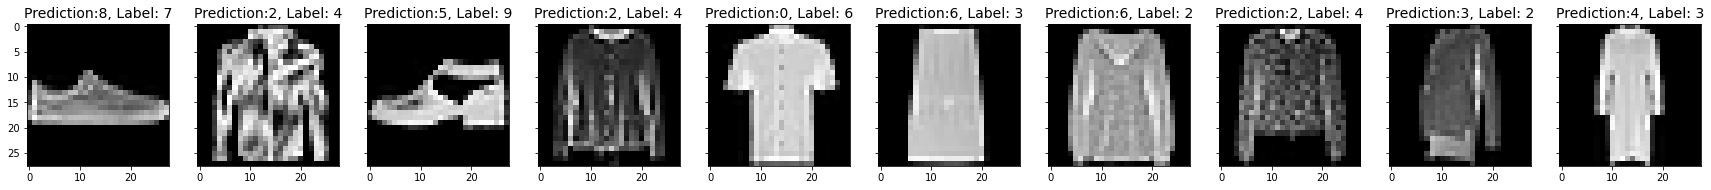

In [13]:
y_misclassified = []
for i in range(len(y_test)):
  if y_pred_classes[i] != y_test[i]:
    y_misclassified.append(i)

fig, axes = plt.subplots(1, 10, figsize = (30,20), sharey = True)

for i, index in enumerate(y_misclassified[:10]):
  sample = X_test[index]
  axes[i].imshow(sample, cmap = 'gray')
  axes[i].set_title(f"Prediction:{y_pred_classes[index]}, Label: {y_test[index]}", fontsize = 14)